In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import os
import random

In [166]:
def change_directory(path):
    '''Essa função será utilizada para alterar o diretório da aplicação.'''
    if not os.getcwd() == path:
        os.chdir(path)
        return True
    return False
        

In [167]:
# LINEAR SEARCH

def linear_search(array, x) :
	passos = 0
	for i in range(0, len(array)):
		passos += 1
		if(array[i] == x):
			return passos # Retorna a quantidade de passos dados até encontrar o valor da busca
	return passos


In [168]:
# BINARY SEARCH

def binary_search(array, l, r, x, passos = 0) :
	''' Uma busca binária começa pelo elemento do meio da lista e
		a divide em duas sublistas (left, right).
		A busca verificará se esse elemento do meio é maior ou menor
		que o elemento buscado. Caso seja maior, o algoritmo verificará
		a sublista left, partindo do meio da lista. Se for menor, 
		verificará right, partindo do meio da lista.

		OBS.: Este algoritmo é ideal para fazer verificações em arrays
		ordenados.
        
        O retorno é a quantidade de passos de execução do algoritmo.
	'''
	passos += 1   # O número de passos é incrementado
    
	if(r >= l) :
		middle = l + (r - l) //2  # indice da metade da tabela

		if(array[middle] == x):
			return passos

		elif(array[middle] > x):
			return binary_search(array, l, middle-1, x, passos)

		else:
			return binary_search(array, middle+1, r, x, passos)
	else:
		return passos

In [169]:
# INTERPOLATION SEARCH

def interpolation_search(array, lo, hi, x, passos = 0):
    '''
    O algoritmo de busca por interpolação trabalha calculando
    a provável posição de um elemento.
    O cálculo da posição é feito, e se caso o elemento estiver
    nela, a quantidade de passos é retornada.
    Caso o elemento buscado for menor do que o elemento correspondente
    à esta posição, o algoritmo procurará o valor (por meio de uma recursão)
    entre os elementos que estão à esquerda.
    E caso o elemento buscado seja maior,  valor será buscado entre os elementos
    da direita.
    
    Caso o elemento não esteja presente no array, será retornado -1.
    '''
    
    passos += 1   # O número de passos é incrementado
    
    # VERIFICANDO SE X ESTÁ ENTRE [lo, hi]
    if(lo <= hi and array[lo] <= x and x <= array[hi]):
        pos = lo + (((hi - lo) * (x - array[lo])) // (array[hi] - array[lo])) 
        
        if (array[pos] == x):
           return passos
    
        elif (array[pos] < x):
           return interpolation_search(array, pos + 1, hi, x, passos)
    
        else:
           return interpolation_search(array, lo, pos - 1, x, passos)

    else:
       return passos

In [198]:
# FUNCTION TO CHECK TIME

def time_check(algo):
    start = time.time()
    passosAlgoritmo = algo
    end = time.time()
    return end -start, passosAlgoritmo


In [171]:
# FUNÇÃO PARA RETORNAR UMA LISTA DOS ELEMENTOS A SEREM BUSCADOS

def elementos_a_buscar(listaPosicoes, base):
    listaElementos = []
    for i in listaPosicoes:
        listaElementos.append(base['0'][i])
    
    # Este elemento não consta em nenhuma das bases, será usado para testar o pior caso de quando não temos um elemento na lista
    listaElementos.append(1000001)   
    listaElementos = sorted(listaElementos)
    return listaElementos

In [172]:
# IMPORT PATH: Path onde coloquei os arquivos do projeto 
path = "/home/vinicius/Área de Trabalho/Projeto-II/bases"
change_directory(path)


# IMPORTANDO AS BASES

# OBS: Os índices de cada base elemento da base foram duplicados. De qualquer forma, devem ser desprezados
baseSequencial10_4 = pd.read_csv('base_10000_sequencial.csv')
baseRandom10_4 = pd.read_csv('base_10000_random.csv')

baseSequencial10_5 = pd.read_csv('base_100000_sequencial.csv')
baseRandom10_5 = pd.read_csv('base_100000_random.csv')

baseSequencial10_6 = pd.read_csv('base_1000000_sequencial.csv')
baseRandom10_6 = pd.read_csv('base_1000000_random.csv')

In [173]:
# LABELS

# PARA OS PRÓXIMOS PASSOS, ASSUMA QUE:
#
#    l = busca linear
#    b = busca binária
#    p = busca por interpolação

In [174]:
# Lista de posições dos elementos que serão buscados
# Por que isso? Por que caso eu assuma esses valores pode ocorrer deles não estarem
# presente na lista por mais de uma vez.

listaPosicoes = [0, 10, 20, 50, 4999, 5000, 9999]
listaPosicoes2 = [10*x for x in listaPosicoes]
listaPosicoes3 = [100*x for x in listaPosicoes]

for i in range(23):
    listaPosicoes.append(random.randint(0, 9999))
    listaPosicoes2.append(random.randint(0, 99999))
    listaPosicoes3.append(random.randint(0, 999999))

    
# Elementos da busca sequencial
elementos_sequenciais_10_4 = elementos_a_buscar(listaPosicoes, baseSequencial10_4)
elementos_sequenciais_10_5 = elementos_a_buscar(listaPosicoes2, baseSequencial10_5)
elementos_sequenciais_10_6 = elementos_a_buscar(listaPosicoes3, baseSequencial10_6)

# Elementos da busca randômica
elementos_random_10_4 = elementos_a_buscar(listaPosicoes, baseRandom10_4)
elementos_random_10_5 = elementos_a_buscar(listaPosicoes2, baseRandom10_5)
elementos_random_10_6 = elementos_a_buscar(listaPosicoes3, baseRandom10_6)

In [175]:
#    BASES DE 10^4 ELEMENTOS:
#
#    Primeiro será feita uma análise da base sequencial
#    E depois da base aleatória.

In [199]:
# VARREDURA NA BASE SEQUENCIAL 10^4

rows = []
for e in elementos_sequenciais_10_4:
    l = time_check(linear_search(baseSequencial10_4['0'][:], e))
    b = time_check(binary_search(baseSequencial10_4['0'][:], 0, 9999, e))
    p = time_check(interpolation_search(baseSequencial10_4['0'][:], 0, 9999, e))
    
    rows.append(pd.Series({"valor": e, "l_tempo" : l[0], "l_passos" : l[1], "b_tempo" : b[0], "b_passos" : b[1], "p_tempo" : p[0], "p_passos" : p[1]}))
    
df_seq_104 = pd.DataFrame(rows)
df_seq_104 = df_seq_104.astype({"valor" : int, "l_tempo" : float, "l_passos" : int, "b_tempo" : float, "b_passos" : int, "p_tempo" : float, "p_passos" : int})

In [200]:
df_seq_104

,valor,l_tempo,l_passos,b_tempo,b_passos,p_tempo,p_passos
0,1,4.768372e-07,1,7.152557e-07,13,7.152557e-07,1
1,11,9.536743e-07,11,7.152557e-07,12,4.768372e-07,1
2,21,7.152557e-07,21,4.768372e-07,12,2.384186e-07,1
3,51,4.768372e-07,51,2.384186e-07,13,4.768372e-07,1
4,318,7.152557e-07,318,4.768372e-07,12,7.152557e-07,1
5,901,9.536743e-07,901,4.768372e-07,13,2.384186e-07,1
6,1122,9.536743e-07,1122,2.384186e-07,10,2.384186e-07,1
7,1270,4.768372e-07,1270,4.768372e-07,13,4.768372e-07,1
8,2063,4.768372e-07,2063,2.384186e-07,13,2.384186e-07,1
9,2109,7.152557e-07,2109,2.384186e-07,7,2.384186e-07,1


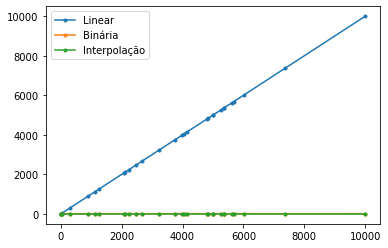

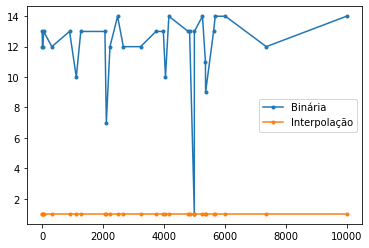

In [178]:
# GRÁFICO DA RELAÇÃO ELEMENTO -> QUANTIDADE DE PASSOS

l_data = df_seq_104['l_passos'][:30]
b_data = df_seq_104['b_passos'][:30]
p_data = df_seq_104['p_passos'][:30]

values = df_seq_104['valor'][:]

fig, ax = plt.subplots()
ax.plot(values[:30], l_data, label= 'Linear', marker=".")
ax.plot(values[:30], b_data, label= 'Binária', marker=".")
ax.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax.legend()

plt.savefig('10 mil Elementos Sequenciais: Comparação gráfica dos três algoritmos.png')

fig2, ax2 = plt.subplots()
ax2.plot(values[:30], b_data, label= 'Binária', marker=".")
ax2.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax2.legend()

plt.savefig('10 mil Elementos Sequenciais: Comparação gráfica entre os algoritmos de busca Binária e por Interpolação.png')

plt.show()

In [179]:
# VARREDURA NA BASE RANDOM 10^4

rows = []
for e in elementos_random_10_4:
    l = time_check(linear_search(baseRandom10_4['0'][:], e))
    b = time_check(binary_search(baseRandom10_4['0'][:], 0, 9999, e))
    p = time_check(interpolation_search(baseRandom10_4['0'][:], 0, 9999, e))
    
    rows.append(pd.Series({"valor": e, "l_tempo" : l[0], "l_passos" : l[1], "b_tempo" : b[0], "b_passos" : b[1], "p_tempo" : p[0], "p_passos" : p[1]}))
    
df_random_104 = pd.DataFrame(rows)
df_random_104 = df_random_104.astype({"valor" : int, "l_tempo" : float, "l_passos" : int, "b_tempo" : float, "b_passos" : int, "p_tempo" : float, "p_passos" : int})


1
13
1
11
12
2
21
12
2
51
13
3
317
12
3
901
13
4
1122
10
5
1270
13
4
2063
13
6
2109
7
2
2228
12
4
2479
14
4
2667
12
5
3234
12
7
3738
13
4
3982
13
4
4052
10
4
4163
14
4
4800
13
3
4844
13
3
5000
1
4
5001
13
4
5267
14
2
5365
11
3
5370
9
4
5632
13
4
5687
14
3
6023
14
3
7364
12
4
10000
14
1
10000
15
1


In [180]:
df_random_104

,valor,l_tempo,l_passos,b_tempo,b_passos,p_tempo,p_passos
0,55,0.001767,1,0.000080,13,0.000064,1
1,674,0.000265,11,0.000287,12,0.000140,2
2,1599,0.000123,21,0.000173,12,0.000088,2
3,4240,0.000130,51,0.000441,13,0.000108,3
4,29378,0.000124,317,0.000103,12,0.000092,3
5,85170,0.000093,901,0.000076,13,0.000147,4
6,106272,0.000072,1122,0.000048,10,0.000041,5
7,123117,0.000069,1270,0.000040,13,0.000044,4
8,202879,0.000066,2063,0.000039,13,0.000041,6
9,207097,0.000093,2109,0.000036,7,0.000095,2


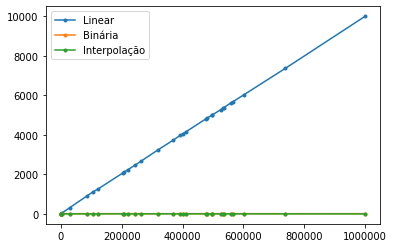

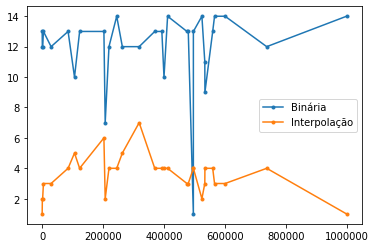

In [181]:
# GRÁFICO DA RELAÇÃO ELEMENTO -> QUANTIDADE DE PASSOS

l_data = df_random_104['l_passos'][:30]
b_data = df_random_104['b_passos'][:30]
p_data = df_random_104['p_passos'][:30]

values = df_random_104['valor'][:]

fig, ax = plt.subplots()
ax.plot(values[:30], l_data, label= 'Linear', marker=".")
ax.plot(values[:30], b_data, label= 'Binária', marker=".")
ax.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax.legend()

plt.savefig('10 mil Elementos Randômicos: Comparação gráfica dos três algoritmos.png')

fig2, ax2 = plt.subplots()
ax2.plot(values[:30], b_data, label= 'Binária', marker=".")
ax2.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax2.legend()

plt.savefig('10 mil Elementos Randômicos: Comparação gráfica entre os algoritmos de busca Binária e por Interpolação.png')

plt.show()

In [182]:
#    BASES DE 10^5 ELEMENTOS:
#
#    Primeiro será feita uma análise da base sequencial
#    E depois da base aleatória.

In [183]:
# VARREDURA NA BASE SEQUENCIAL 10^5

rows = []
for e in elementos_sequenciais_10_5:
    l = time_check(linear_search(baseSequencial10_5['0'][:], e))
    b = time_check(binary_search(baseSequencial10_5['0'][:], 0, 99999, e))
    p = time_check(interpolation_search(baseSequencial10_5['0'][:], 0, 99999, e))
    
    rows.append(pd.Series({"valor": e, "l_tempo" : l[0], "l_passos" : l[1], "b_tempo" : b[0], "b_passos" : b[1], "p_tempo" : p[0], "p_passos" : p[1]}))
    
df_seq_105 = pd.DataFrame(rows)
df_seq_105 = df_seq_105.astype({"valor" : int, "l_tempo" : float, "l_passos" : int, "b_tempo" : float, "b_passos" : int, "p_tempo" : float, "p_passos" : int})


1
16
1
101
16
1
201
14
1
501
17
1
4442
11
1
7059
16
1
14822
16
1
27598
17
1
28373
17
1
32259
15
1
35578
17
1
40818
16
1
41151
15
1
49991
16
1
49991
16
1
50001
16
1
51305
16
1
52862
16
1
53796
16
1
59357
16
1
64192
15
1
64642
17
1
72245
17
1
73187
17
1
75899
15
1
84791
17
1
85139
17
1
92973
17
1
98758
16
1
99991
15
1
100000
18
1


In [184]:
df_seq_105

,valor,l_tempo,l_passos,b_tempo,b_passos,p_tempo,p_passos
0,1,0.000108,1,0.000078,16,0.000353,1
1,101,0.000076,101,0.000073,16,0.000066,1
2,201,0.000073,201,0.000071,14,0.000080,1
3,501,0.000081,501,0.000069,17,0.000449,1
4,4442,0.000078,4442,0.000073,11,0.000102,1
5,7059,0.000177,7059,0.000098,16,0.000148,1
6,14822,0.000087,14822,0.000076,16,0.000069,1
7,27598,0.000187,27598,0.000088,17,0.000083,1
8,28373,0.000097,28373,0.000092,17,0.000086,1
9,32259,0.000263,32259,0.000079,15,0.000085,1


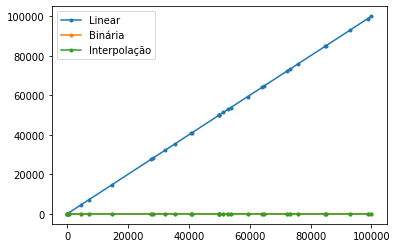

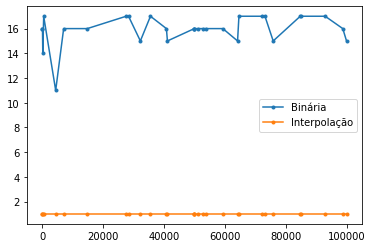

In [185]:
# GRÁFICO DA RELAÇÃO ELEMENTO -> QUANTIDADE DE PASSOS

l_data = df_seq_105['l_passos'][:30]
b_data = df_seq_105['b_passos'][:30]
p_data = df_seq_105['p_passos'][:30]

values = df_seq_105['valor'][:]

fig, ax = plt.subplots()
ax.plot(values[:30], l_data, label= 'Linear', marker=".")
ax.plot(values[:30], b_data, label= 'Binária', marker=".")
ax.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax.legend()

plt.savefig('100 mil Elementos Sequenciais: Comparação gráfica dos três algoritmos.png')

fig2, ax2 = plt.subplots()
ax2.plot(values[:30], b_data, label= 'Binária', marker=".")
ax2.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax2.legend()

plt.savefig('100 mil Elementos Sequenciais: Comparação gráfica entre os algoritmos de busca Binária e por Interpolação.png')

plt.show()

In [186]:
# VARREDURA NA BASE RANDOM 10^5

rows = []

for e in elementos_random_10_5:
    l = time_check(linear_search(baseRandom10_5['0'][:], e))
    b = time_check(binary_search(baseRandom10_5['0'][:], 0, 99999, e))
    p = time_check(interpolation_search(baseRandom10_5['0'][:], 0, 99999, e))
    
    rows.append(pd.Series({"valor": e, "l_tempo" : l[0], "l_passos" : l[1], "b_tempo" : b[0], "b_passos" : b[1], "p_tempo" : p[0], "p_passos" : p[1]}))
    
df_random_105 = pd.DataFrame(rows)
df_random_105 = df_random_105.astype({"valor" : int, "l_tempo" : float, "l_passos" : int, "b_tempo" : float, "b_passos" : int, "p_tempo" : float, "p_passos" : int})

1
16
1
101
16
4
201
14
3
501
17
2
4442
11
4
7058
15
5
14822
16
4
27598
17
4
28373
17
2
32259
15
3
35578
17
4
40818
16
3
41151
15
4
49991
16
3
49991
16
3
50000
1
4
51305
16
4
52862
16
3
53796
16
6
59357
16
4
64192
15
4
64642
17
4
72245
17
4
73187
17
3
75899
15
4
84791
17
4
85139
17
4
92973
17
3
98758
16
3
99991
15
1
100000
18
1


In [187]:
df_random_105

,valor,l_tempo,l_passos,b_tempo,b_passos,p_tempo,p_passos
0,1,0.000139,1,0.000260,16,0.000334,1
1,1162,0.000388,101,0.000097,16,0.000572,4
2,2254,0.000087,201,0.000073,14,0.000074,3
3,5356,0.000072,501,0.000071,17,0.000072,2
4,45755,0.000073,4442,0.000074,11,0.000081,4
5,71836,0.000084,7058,0.000074,15,0.000071,5
6,148808,0.000386,14822,0.000077,16,0.000097,4
7,275725,0.000374,27598,0.000077,17,0.000070,4
8,283511,0.000103,28373,0.000070,17,0.000077,2
9,322715,0.000084,32259,0.000101,15,0.000069,3


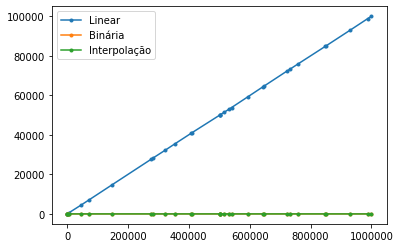

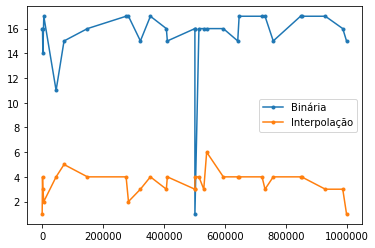

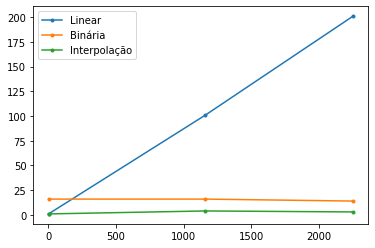

In [188]:
# GRÁFICO DA RELAÇÃO ELEMENTO -> QUANTIDADE DE PASSOS

l_data = df_random_105['l_passos'][:30]
b_data = df_random_105['b_passos'][:30]
p_data = df_random_105['p_passos'][:30]

values = df_random_105['valor'][:]

fig, ax = plt.subplots()
ax.plot(values[:30], l_data, label= 'Linear', marker=".")
ax.plot(values[:30], b_data, label= 'Binária', marker=".")
ax.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax.legend()

plt.savefig('100 mil Elementos Randômicos: Comparação os três algoritmos.png')

fig2, ax2 = plt.subplots()
ax2.plot(values[:30], b_data, label= 'Binária', marker=".")
ax2.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax2.legend()

plt.savefig('100 mil Elementos Randômicos: Comparação gráfica entre os algoritmos de busca Binária e por Interpolação.png')

fig3, ax3 = plt.subplots()
ax3.plot(values[:3], l_data[:3], label= 'Linear', marker=".")
ax3.plot(values[:3], b_data[:3], label= 'Binária', marker=".")
ax3.plot(values[:3], p_data[:3], label= 'Interpolação', marker=".")
ax3.legend()

plt.savefig('100 mil Elementos Randômicos: Analisando o desempenho nos primeiros elementos')

plt.show()

In [189]:
#    BASES DE 10^6 ELEMENTOS:
#
#    Primeiro será feita uma análise da base sequencial
#    E depois da base aleatória.

In [190]:
# VARREDURA NA BASE SEQUENCIAL 10^6

rows = []
for e in elementos_sequenciais_10_6:
    l = time_check(linear_search(baseSequencial10_6['0'][:], e))
    b = time_check(binary_search(baseSequencial10_6['0'][:], 0, 999999, e))
    p = time_check(interpolation_search(baseSequencial10_6['0'][:], 0, 999999, e))
    
    rows.append(pd.Series({"valor": e, "l_tempo" : l[0], "l_passos" : l[1], "b_tempo" : b[0], "b_passos" : b[1], "p_tempo" : p[0], "p_passos" : p[1]}))
    
df_seq_106 = pd.DataFrame(rows)
df_seq_106 = df_seq_106.astype({"valor" : int, "l_tempo" : float, "l_passos" : int, "b_tempo" : float, "b_passos" : int, "p_tempo" : float, "p_passos" : int})


1
19
1
1001
20
1
2001
20
1
5001
20
1
7720
19
1
53350
20
1
103703
19
1
110744
20
1
162349
18
1
176803
20
1
185935
20
1
189013
18
1
218666
19
1
333284
18
1
375737
19
1
393486
20
1
499901
19
1
500001
19
1
615296
19
1
624796
18
1
642526
20
1
700420
19
1
706628
20
1
733912
18
1
761764
20
1
795965
20
1
865309
20
1
890170
20
1
989920
17
1
999901
20
1
1000000
21
1


In [194]:
df_seq_106

,valor,l_tempo,l_passos,b_tempo,b_passos,p_tempo,p_passos
0,1,0.000107,1,0.000074,19,0.000067,1
1,1001,0.000075,1001,0.000066,20,0.000065,1
2,2001,0.000072,2001,0.000109,20,0.000070,1
3,5001,0.000378,5001,0.000076,20,0.000074,1
4,7720,0.000097,7720,0.000087,19,0.000083,1
5,53350,0.000081,53350,0.000067,20,0.000071,1
6,103703,0.000368,103703,0.000072,19,0.000065,1
7,110744,0.000078,110744,0.000068,20,0.000069,1
8,162349,0.000077,162349,0.000069,18,0.000071,1
9,176803,0.000079,176803,0.000069,20,0.000072,1


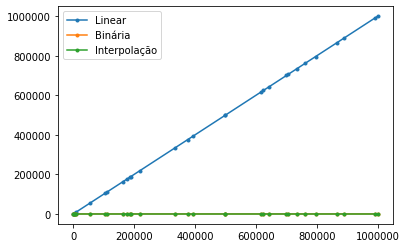

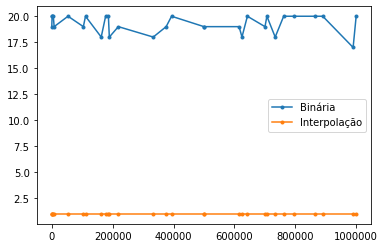

In [191]:
# GRÁFICO DA RELAÇÃO ELEMENTO -> QUANTIDADE DE PASSOS

l_data = df_seq_106['l_passos'][:30]
b_data = df_seq_106['b_passos'][:30]
p_data = df_seq_106['p_passos'][:30]

values = df_seq_106['valor'][:]

fig, ax = plt.subplots()
ax.plot(values[:30], l_data, label= 'Linear', marker=".")
ax.plot(values[:30], b_data, label= 'Binária', marker=".")
ax.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax.legend()

plt.savefig('1 milhão de Elementos Sequenciais: Comparação gráfica dos três algoritmos.png')

fig2, ax2 = plt.subplots()
ax2.plot(values[:30], b_data, label= 'Binária', marker=".")
ax2.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax2.legend()

plt.savefig('1 milhão de Elementos Sequenciais: Comparação gráfica entre os algoritmos de busca Binária e por Interpolação.png')

plt.show()

In [192]:
# VARREDURA NA BASE RANDOM 10^6

rows = []

for e in elementos_random_10_6:
    l = time_check(linear_search(baseRandom10_6['0'][:], e))
    b = time_check(binary_search(baseRandom10_6['0'][:], 0, 999999, e))
    p = time_check(interpolation_search(baseRandom10_6['0'][:], 0, 999999, e))
    
    rows.append(pd.Series({"valor": e, "l_tempo" : l[0], "l_passos" : l[1], "b_tempo" : b[0], "b_passos" : b[1], "p_tempo" : p[0], "p_passos" : p[1]}))
    
df_random_106 = pd.DataFrame(rows)
df_random_106 = df_random_106.astype({"valor" : int, "l_tempo" : float, "l_passos" : int, "b_tempo" : float, "b_passos" : int, "p_tempo" : float, "p_passos" : int})

1
16
1
1001
16
4
2001
16
3
5001
16
3
7719
14
2
53350
14
6
103703
18
1
110742
18
1
162348
18
1
176801
18
1
185935
18
1
189012
18
1
218666
18
1
333282
18
1
375737
18
1
393486
18
1
499900
18
1
500000
18
1
615295
18
1
624796
18
1
642525
18
1
700420
18
1
706628
18
1
733910
18
1
761764
18
1
795963
18
1
865309
18
1
890168
18
1
989917
18
1
999900
18
1
1000000
18
1


In [195]:
df_random_106

,valor,l_tempo,l_passos,b_tempo,b_passos,p_tempo,p_passos
0,1,0.000103,1,0.000126,16,0.000102,1
1,990,0.000083,1001,0.000080,16,0.000080,4
2,1999,0.000080,2001,0.000080,16,0.000079,3
3,5020,0.000093,5001,0.000084,16,0.000081,3
4,7832,0.000355,7719,0.000080,14,0.000103,2
5,53737,0.000104,53350,0.000086,14,0.000084,6
6,104041,0.000095,103703,0.000085,18,0.000086,1
7,111150,0.000095,110742,0.000080,18,0.000080,1
8,162378,0.000076,162348,0.000068,18,0.000067,1
9,176800,0.000569,176801,0.000074,18,0.000073,1


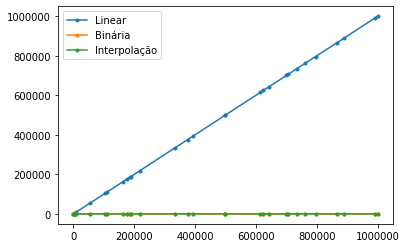

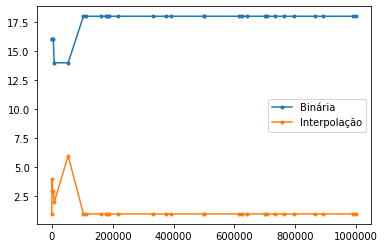

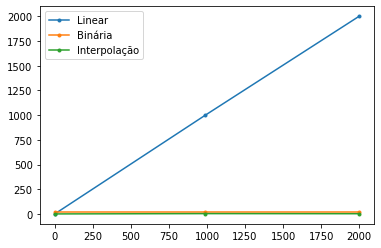

In [193]:
# GRÁFICO DA RELAÇÃO ELEMENTO -> QUANTIDADE DE PASSOS

l_data = df_random_106['l_passos'][:30]
b_data = df_random_106['b_passos'][:30]
p_data = df_random_106['p_passos'][:30]

values = df_random_106['valor'][:]

fig, ax = plt.subplots()
ax.plot(values[:30], l_data, label= 'Linear', marker=".")
ax.plot(values[:30], b_data, label= 'Binária', marker=".")
ax.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax.legend()

plt.savefig('1 milhão de Elementos Randômicos: Comparação os três algoritmos.png')

fig2, ax2 = plt.subplots()
ax2.plot(values[:30], b_data, label= 'Binária', marker=".")
ax2.plot(values[:30], p_data, label= 'Interpolação', marker=".")
ax2.legend()

plt.savefig('1 milhão de Elementos Randômicos: Comparação gráfica entre os algoritmos de busca Binária e por Interpolação.png')

fig3, ax3 = plt.subplots()
ax3.plot(values[:3], l_data[:3], label= 'Linear', marker=".")
ax3.plot(values[:3], b_data[:3], label= 'Binária', marker=".")
ax3.plot(values[:3], p_data[:3], label= 'Interpolação', marker=".")
ax3.legend()

plt.savefig('1 milhão de Elementos Randômicos: Analisando o desempenho nos primeiros elementos')

plt.show()

In [206]:
## ANALISANDO OS 20 PRIMEIROS ELEMENTOS
primeirosElementos = baseRandom10_6['0'][0:22]

lista = []
for i in primeirosElementos:
    l = time_check(linear_search(baseRandom10_6['0'][:], i))
    b = time_check(binary_search(baseRandom10_6['0'][:], 0, 999999, i))
    p = time_check(interpolation_search(baseRandom10_6['0'][:], 0, 999999, i))
    
    lista.append(pd.Series({"valor": i, "l_tempo" : l[0], "l_passos" : l[1], "b_tempo" : b[0], "b_passos" : b[1], "p_tempo" : p[0], "p_passos" : p[1]}))

df_primeiros = pd.DataFrame(lista)
df_primeiros = df_primeiros.astype({"valor" : int, "l_tempo" : float, "l_passos" : int, "b_tempo" : float, "b_passos" : int, "p_tempo" : float, "p_passos" : int})

In [207]:
df_primeiros

,valor,l_tempo,l_passos,b_tempo,b_passos,p_tempo,p_passos
0,1,1.430511e-06,1,7.152557e-07,19,4.768372e-07,1
1,1,2.384186e-07,1,1.430511e-06,19,4.768372e-07,1
2,2,2.384186e-07,3,7.152557e-07,18,4.768372e-07,2
3,3,4.768372e-07,4,7.152557e-07,20,4.768372e-07,2
4,5,4.768372e-07,5,4.768372e-07,19,7.152557e-07,1
5,6,4.768372e-07,6,4.768372e-07,20,1.192093e-06,1
6,8,9.536743e-07,7,4.768372e-07,17,4.768372e-07,2
7,9,4.768372e-07,8,4.768372e-07,19,7.152557e-07,1
8,9,7.152557e-07,8,9.536743e-07,19,7.152557e-07,1
9,11,4.768372e-07,10,4.768372e-07,20,7.152557e-07,2


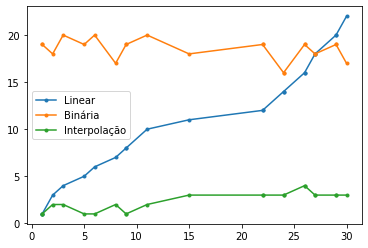

In [211]:
fig, ax = plt.subplots()
ax.plot(primeirosElementos, df_primeiros['l_passos'][:], label="Linear", marker=".")
ax.plot(primeirosElementos, df_primeiros['b_passos'][:], label="Binária", marker=".")
ax.plot(primeirosElementos, df_primeiros['p_passos'][:], label="Interpolação", marker=".")
ax.legend()

plt.savefig("Análise dos primeiros 20 elementos da base com 1 milhão")
plt.show()